# Machine Learning Broadening of Spectral Lines

In [32]:
%load_ext autoreload
%autoreload 2

from spectralbroadening.ml_model import model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


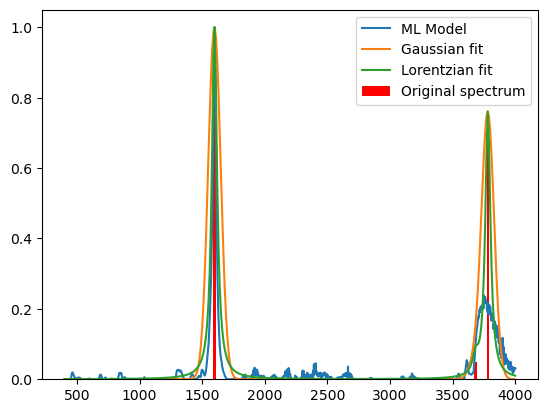

In [29]:
frequencies = np.array([1598.0372406800595, 3682.1786484947465, 3780.8505903567507])
intensities = np.array([76.3428, 3.6852, 57.5517])

model_path = r"C:\Users\rhys-\Documents\GitHub\infraredml\SpectralBroadening\src\data\model19.pt"

xs = np.arange(400,4002,2)
output = model.pytorch_model_spectrum(frequencies,intensities,xs, model_path)

def lorentzian(x, y, xmin, xmax, xstep, gamma):
    xi = np.arange(xmin, xmax, xstep)
    yi = np.zeros(len(xi))
    for i in range(len(xi)):
        for k in range(len(x)):
            yi[i] = (
                yi[i]
                + y[k] * gamma / ((xi[i] - x[k]) ** 2 + (gamma / 2.0) ** 2) / np.pi
            )
    return xi, yi


def gaussian(x, y, xmin, xmax, xstep, sigma):
    xi = np.arange(xmin, xmax, xstep)
    yi = np.zeros(len(xi))
    for i in range(len(xi)):
        for k in range(len(y)):
            yi[i] = yi[i] + y[k] * np.e ** (-((xi[i] - x[k]) ** 2) / (2 * sigma ** 2))
    return xi, yi

gaussian_fit = gaussian(frequencies, intensities, 400, 4002, 10, 50)
lorentzian_fit = lorentzian(frequencies, intensities, 400, 4002, 10, 50)


plt.plot(xs, output/np.max(output), label="ML Model")
plt.plot(gaussian_fit[0], gaussian_fit[1]/np.max(gaussian_fit[1]), label="Gaussian fit")
plt.plot(lorentzian_fit[0], lorentzian_fit[1]/np.max(lorentzian_fit[1]), label="Lorentzian fit")
plt.bar(frequencies, intensities/np.max(intensities), width=20, color="red", label="Original spectrum")
plt.legend()
plt.show()

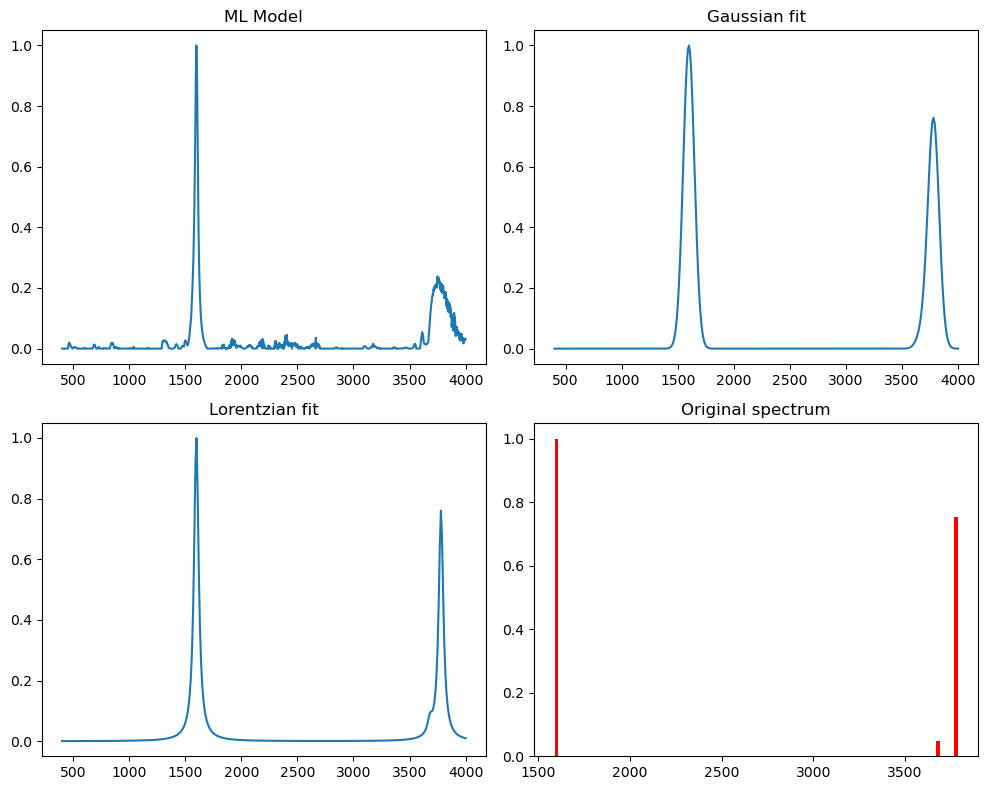

In [30]:
def plot_subplots(frequencies, intensities, xs, output, gaussian_fit, lorentzian_fit):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Plot ML Model output
    axs[0, 0].plot(xs, output/np.max(output))
    axs[0, 0].set_title('ML Model')

    # Plot Gaussian fit
    axs[0, 1].plot(gaussian_fit[0], gaussian_fit[1]/np.max(gaussian_fit[1]))
    axs[0, 1].set_title('Gaussian fit')

    # Plot Lorentzian fit
    axs[1, 0].plot(lorentzian_fit[0], lorentzian_fit[1]/np.max(lorentzian_fit[1]))
    axs[1, 0].set_title('Lorentzian fit')

    # Plot original spectrum
    axs[1, 1].bar(frequencies, intensities/np.max(intensities), width=20, color="red")
    axs[1, 1].set_title('Original spectrum')

    plt.tight_layout()
    plt.show()

# Call the function with the data
plot_subplots(frequencies, intensities, xs, output, gaussian_fit, lorentzian_fit)


In [33]:
chnops_path = r"C:\Users\rhys-\OneDrive\Honours\Data\CHNOPS2743-HARMONIC.csv"
chnops = pd.read_csv(chnops_path)
chnops.head(10)

,Unnamed: 0,Formula,IUPAC_chemname,SMILES,# Atoms,RawFreq [cm-1],ScaledFreq [cm-1],Intensity,mu_A [D],mu_B [D],mu_C [D],mu_tot [D],A [cm-1],B [cm-1],C [cm-1]
0,0,CO,Carbon monoxide,[C-]#[O+],2,[2209.851],[2129.890310508303],[81.1924],1.035419e-01,0.000000e+00,0.0,1.035419e-01,0.000000,1.934415,1.934415
1,1,O2,dioxygen,O=O,2,[1645.8692],[1611.5673552674284],[0.0],1.000000e-07,0.000000e+00,0.0,1.000000e-07,0.000000,1.454663,1.454663
2,2,N2,dinitrogen,N#N,2,[2438.602],[2350.364242198306],[0.0],0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,2.013151,2.013151
3,3,H2S,hydrogen sulfide,S,3,"[1208.2455, 2674.3332, 2688.5077]","[1183.0642465080284, 2577.5658040974995, 2591....","[0.458, 0.0413, 0.0459]",0.000000e+00,-9.919383e-01,0.0,9.919383e-01,10.280928,8.877414,4.763881
4,4,H2O,water,O,3,"[1632.0511, 3820.4156, 3922.7919]","[1598.0372406800595, 3682.1786484947465, 3780....","[76.3428, 3.6852, 57.5517]",0.000000e+00,-1.843688e+00,0.0,1.843688e+00,27.294469,14.394592,9.424360
5,5,CO2,carbon dioxide,O=C=O,3,"[675.2482, 675.2482, 1374.0154, 2415.1198]","[672.1392654534449, 672.1392654534449, 1345.37...","[29.18, 29.18, 0.0, 666.8125]",5.000000e-07,0.000000e+00,0.0,5.000000e-07,0.000000,0.390895,0.390895
6,6,CS2,carbon disulfide,S=C=S,3,"[405.0082, 405.0082, 674.6959, 1555.9171]","[403.1434871660848, 403.1434871660848, 671.589...","[3.6595, 3.6595, 0.0, 684.6389]",1.110000e-05,-1.000000e-07,0.0,1.110045e-05,0.000000,0.109015,0.109015
7,7,HNO,nitrosyl hydride,N=O,3,"[1561.4136, 1671.5189, 2864.0258]","[1528.8719090378472, 1636.6824854323304, 2760....","[8.3453, 86.0922, 148.7412]",-1.004107e+00,1.285893e+00,0.0,1.631487e+00,18.632742,1.434620,1.332059
8,8,HOP,oxophosphane,P=O,3,"[1001.161, 1228.579, 2112.8349]","[980.295630398147, 1202.9739725168329, 2036.38...","[24.7397, 67.3881, 258.8621]",2.267317e+00,-2.796449e-01,0.0,2.284498e+00,8.771527,0.701474,0.649530
9,9,O2S,sulfur dioxide,O=S=O,3,"[522.7198, 1193.9443, 1396.0252]","[520.3131269509072, 1169.0611002913363, 1366.9...","[28.8022, 31.0476, 221.9657]",1.700000e-06,1.645848e+00,0.0,1.645848e+00,1.994139,0.343361,0.292924
